In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv(r'C:\Users\Mr. Amlan chatterjee\Documents\AB\M2_PISABAZAR_BANKING FRAUD _ANALYSIS\dataset.csv')
df.head(5)

,ID,Customer_ID,Month,Name,Age,SSN,Occupation,Annual_Income,Monthly_Inhand_Salary,Num_Bank_Accounts,...,Credit_Mix,Outstanding_Debt,Credit_Utilization_Ratio,Credit_History_Age,Payment_of_Min_Amount,Total_EMI_per_month,Amount_invested_monthly,Payment_Behaviour,Monthly_Balance,Credit_Score
0,5634,3392,1,Aaron Maashoh,23.0,821000265.0,Scientist,19114.12,1824.843333,3.0,...,Good,809.98,26.822620,265.0,No,49.574949,21.46538,High_spent_Small_value_payments,312.494089,Good
1,5635,3392,2,Aaron Maashoh,23.0,821000265.0,Scientist,19114.12,1824.843333,3.0,...,Good,809.98,31.944960,266.0,No,49.574949,21.46538,Low_spent_Large_value_payments,284.629162,Good
2,5636,3392,3,Aaron Maashoh,23.0,821000265.0,Scientist,19114.12,1824.843333,3.0,...,Good,809.98,28.609352,267.0,No,49.574949,21.46538,Low_spent_Medium_value_payments,331.209863,Good
3,5637,3392,4,Aaron Maashoh,23.0,821000265.0,Scientist,19114.12,1824.843333,3.0,...,Good,809.98,31.377862,268.0,No,49.574949,21.46538,Low_spent_Small_value_payments,223.451310,Good
4,5638,3392,5,Aaron Maashoh,23.0,821000265.0,Scientist,19114.12,1824.843333,3.0,...,Good,809.98,24.797347,269.0,No,49.574949,21.46538,High_spent_Medium_value_payments,341.489231,Good


In [3]:
# Check total null values in each column
null_counts = df.isnull().sum()
print(null_counts)

ID                          0
Customer_ID                 0
Month                       0
Name                        0
Age                         0
SSN                         0
Occupation                  0
Annual_Income               0
Monthly_Inhand_Salary       0
Num_Bank_Accounts           0
Num_Credit_Card             0
Interest_Rate               0
Num_of_Loan                 0
Type_of_Loan                0
Delay_from_due_date         0
Num_of_Delayed_Payment      0
Changed_Credit_Limit        0
Num_Credit_Inquiries        0
Credit_Mix                  0
Outstanding_Debt            0
Credit_Utilization_Ratio    0
Credit_History_Age          0
Payment_of_Min_Amount       0
Total_EMI_per_month         0
Amount_invested_monthly     0
Payment_Behaviour           0
Monthly_Balance             0
Credit_Score                0
dtype: int64


# Correlation Anual Income vs Credit Score

To Check correlation between Anual Income and Credit Score, both descriptive statistical method and inferantial statistical 
method has been adapted. 
In descriptive statistical method the Anual Income has been grouped by Credit Score Groups and their 
statistics has been calculated and visualized through box plots.
In the inferantial statistical method Anova Test has been performed (insted of T-test, there are more than 2 groups).

## Descriptive Statistical Method:

In [4]:
# Check unique values in the 'Credit_Score' column
unique_credit_scores = df['Credit_Score'].unique()
print(f"Unique credit score types: {unique_credit_scores}")

Unique credit score types: ['Good' 'Standard' 'Poor']


In [5]:
# Group by Credit_Score and calculate statistics
income_by_credit_score = df.groupby('Credit_Score')['Annual_Income'].describe()
print(income_by_credit_score)

                count          mean           std       min       25%  \
Credit_Score                                                            
Good          17828.0  65203.672105  44484.883431  7189.540  29709.73   
Poor          28998.0  40584.515325  31969.248921  7005.930  16770.91   
Standard      53174.0  50987.164840  37569.335731  7006.035  19998.33   

                    50%        75%        max  
Credit_Score                                   
Good          44927.860  97417.425  179825.36  
Poor          32064.860  57877.950  179987.28  
Standard      36824.175  72904.160  179987.28  


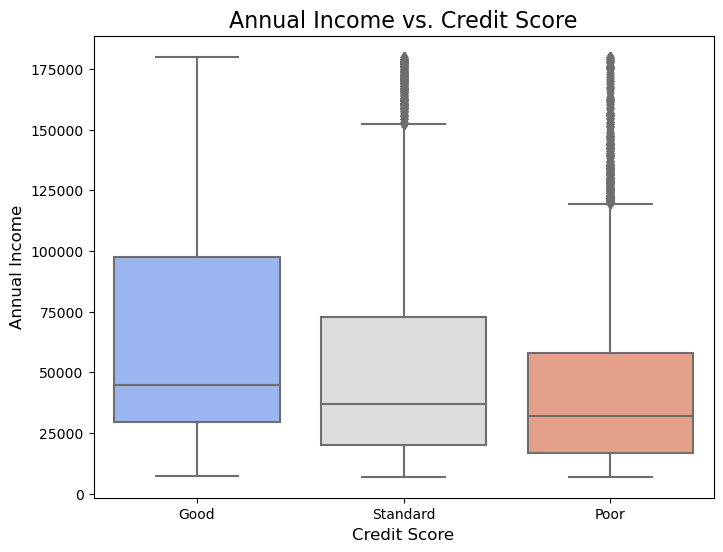

In [6]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(8, 6))
sns.boxplot(x='Credit_Score', y='Annual_Income', data=df, palette='coolwarm')
plt.title('Annual Income vs. Credit Score', fontsize=16)
plt.xlabel('Credit Score', fontsize=12)
plt.ylabel('Annual Income', fontsize=12)
plt.show()

### Interpretation of Descriptive Statistics:

    
    1. Higher medians in "Good" and "Excellent" suggest higher average incomes for these groups compared to others.
    2. Outliers in "Poor" scores could suggest some individuals with unexpectedly high incomes.
    3. Short boxes for "Good" and "Excellent" scores might indicate consistent incomes in these groups.

## Inferantial Statistical Method:

In the inferantial statistical method as there are more than 2 groups, Anova Test has been performed insted of T-test.

In [7]:
from scipy.stats import f_oneway

# Extract Annual_Income for each credit score type
income_groups = [group['Annual_Income'].values for name, group in df.groupby('Credit_Score')]

# Perform ANOVA test
f_stat, p_value = f_oneway(*income_groups)
print(f"ANOVA F-statistic: {f_stat}, p-value: {p_value}")

ANOVA F-statistic: 2399.8067086544206, p-value: 0.0


### Interpretation of Inferential Statistical Method:

Here p value is rounded to 0 signifies that, Credit_Score is strongly correlated with Annual_Income.

### Conclusion:

By the above data visualization and statistical test performed, it can be concluded that, 
a higher anual income is strongly correlated with higher credit score. 
However, in some cases, persons with high income, have a poor credit socre.

# Does the Credit Utilization Ratio has greater impact on Credit Scores compared to the Total Number of Loans Taken ?

                          Credit_Score_Encoded  Credit_Utilization_Ratio  \
Credit_Score_Encoded                  1.000000                 -0.014371   
Credit_Utilization_Ratio             -0.014371                  1.000000   
Num_of_Loan                           0.064064                 -0.100469   

                          Num_of_Loan  
Credit_Score_Encoded         0.064064  
Credit_Utilization_Ratio    -0.100469  
Num_of_Loan                  1.000000  


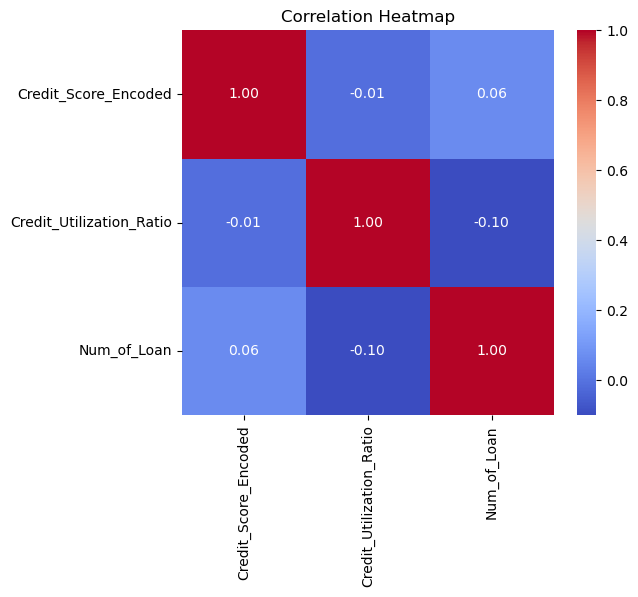

In [8]:
from sklearn.preprocessing import LabelEncoder

# Encode Credit_Score as numeric
le = LabelEncoder()
df['Credit_Score_Encoded'] = le.fit_transform(df['Credit_Score'])

# Calculate correlations
correlations = df[['Credit_Score_Encoded', 'Credit_Utilization_Ratio', 'Num_of_Loan']].corr()
print(correlations)

# Correlation heatmap
corr_matrix = df[['Credit_Score_Encoded', 'Credit_Utilization_Ratio', 'Num_of_Loan']].corr()
plt.figure(figsize=(6, 5))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlation Heatmap')
plt.show()

The computed correlations indicate nither Credit Utilization Ratio, nor the Number of Loans have strong linear correlation with Credit Score.

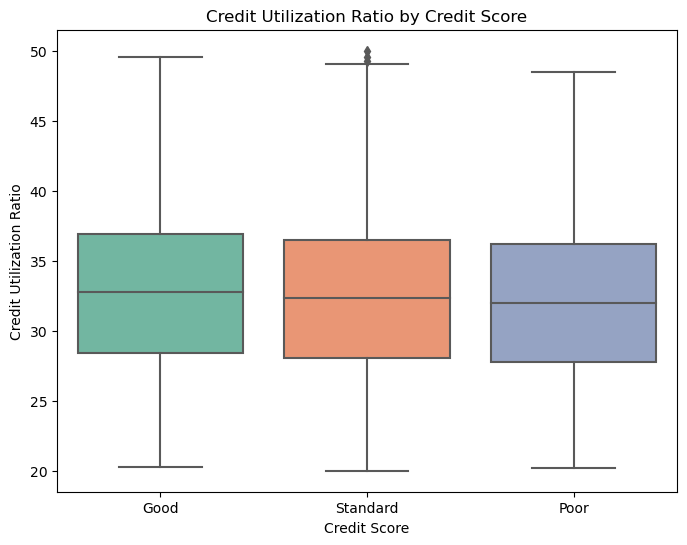

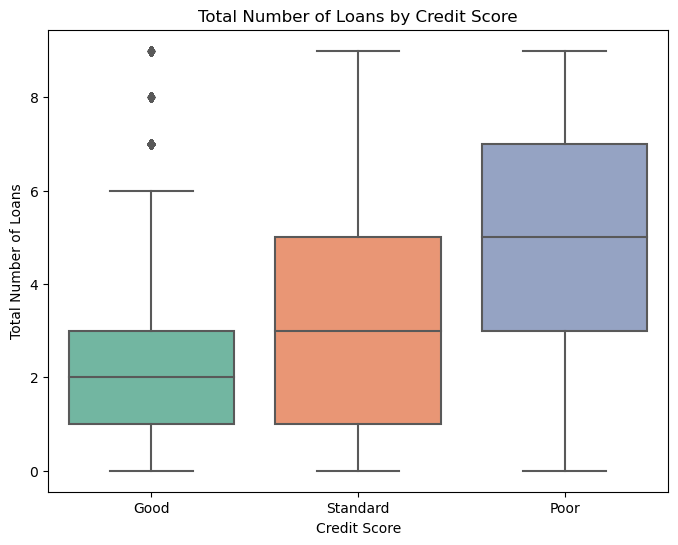

In [9]:
import seaborn as sns
import matplotlib.pyplot as plt

# Boxplot for Credit Utilization Ratio by Credit Score
plt.figure(figsize=(8, 6))
sns.boxplot(x='Credit_Score', y='Credit_Utilization_Ratio', data=df, palette='Set2')
plt.title('Credit Utilization Ratio by Credit Score')
plt.xlabel('Credit Score')
plt.ylabel('Credit Utilization Ratio')
plt.show()

# Boxplot for Total Number of Loans by Credit Score
plt.figure(figsize=(8, 6))
sns.boxplot(x='Credit_Score', y='Num_of_Loan', data=df, palette='Set2')
plt.title('Total Number of Loans by Credit Score')
plt.xlabel('Credit Score')
plt.ylabel('Total Number of Loans')
plt.show()


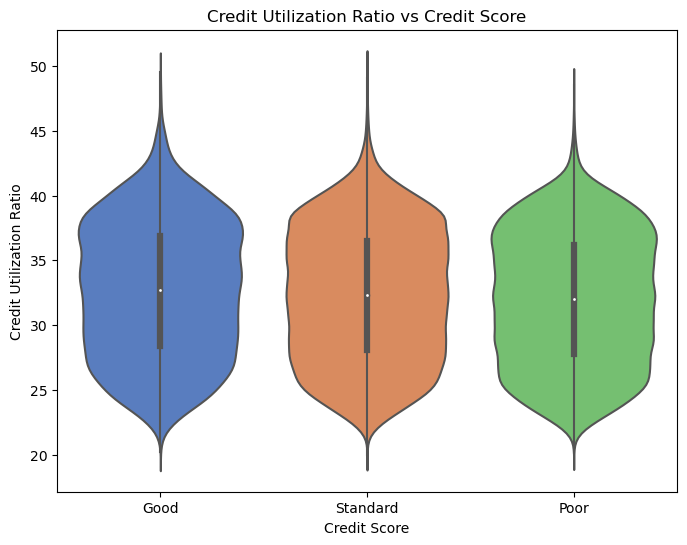

In [10]:
import seaborn as sns
import matplotlib.pyplot as plt

# Violin plot for Credit Utilization Ratio
plt.figure(figsize=(8, 6))
sns.violinplot(x='Credit_Score', y='Credit_Utilization_Ratio', data=df, palette='muted')
plt.title('Credit Utilization Ratio vs Credit Score')
plt.xlabel('Credit Score')
plt.ylabel('Credit Utilization Ratio')
plt.savefig("CUR.png", dpi=300, bbox_inches='tight')
plt.show()

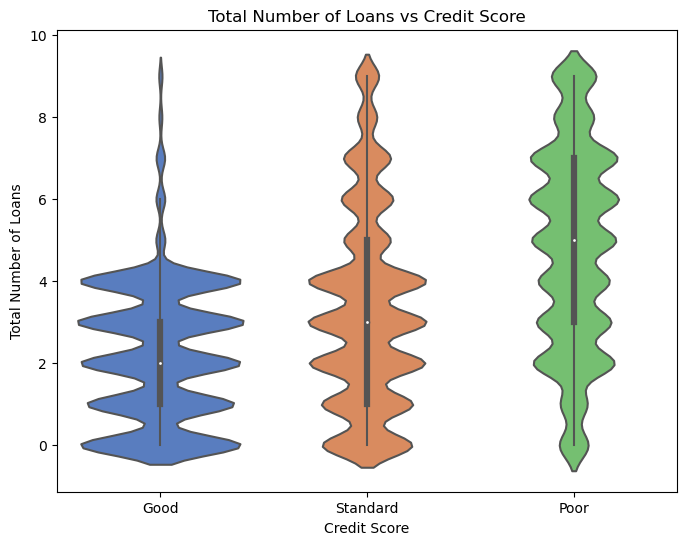

In [11]:
# Violin plot for Total Number of Loans
plt.figure(figsize=(8, 6))
sns.violinplot(x='Credit_Score', y='Num_of_Loan', data=df, palette='muted')
plt.title('Total Number of Loans vs Credit Score')
plt.xlabel('Credit Score')
plt.ylabel('Total Number of Loans')
plt.savefig("TNL.png", dpi=300, bbox_inches='tight')
plt.show()

**General Insights:**

1. Credit utilization ratio and total number of loans are both critical metrics impacting credit scores. Higher utilization and more loans appear correlated with lower credit scores (Standard and Poor).
2. The stability and distribution of both metrics can be used to segment customers by credit risk and guide credit-related decision-making.


**Comparison of the Violin Plots:**

1. The Credit Utilization Ratio plot shows a more consistent and clear distinction between categories (Good, Standard, Poor) with lower utilization correlating to higher scores.
2. The Total Number of Loans plot shows some relationship with credit score, but the variability within each score category is higher, making it less decisive.


**Conclusion:**

Credit Utilization Ratio has a more significant impact on credit scores based on both general credit scoring principles and the patterns observed in the plots. While both variables influence credit scores, managing credit utilization (keeping it low) is more critical for maintaining or improving scores than simply reducing the number of loans. However, having too many loans may still negatively impact scores due to its relationship with overall debt burden and credit inquiries.


## Is higher Credit Score is associated with Higer Number of Credit Cards ?

count    100000.000000
mean         32.285173
std           5.116875
min          20.000000
25%          28.052567
50%          32.305784
75%          36.496663
max          50.000000
Name: Credit_Utilization_Ratio, dtype: float64


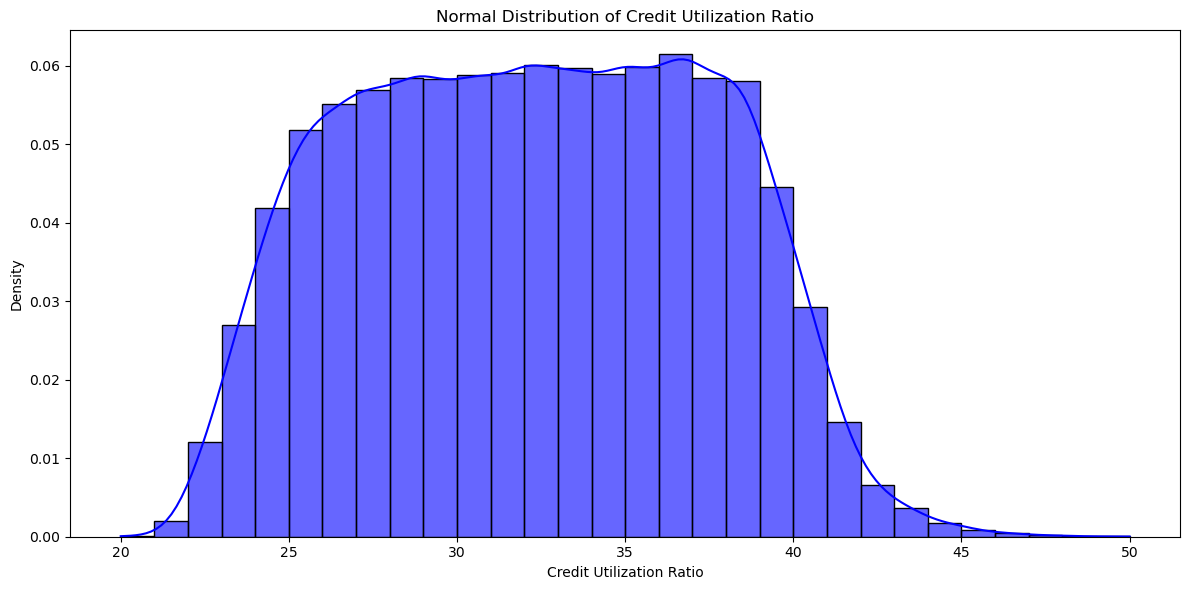

In [12]:
# Statistical summary of the Credit Utilization Ratio
summary = df['Credit_Utilization_Ratio'].describe()

# Print the summary
print(summary)

import seaborn as sns
import matplotlib.pyplot as plt

# Create a histogram for the Credit Utilization Ratio
plt.figure(figsize=(12, 6))

sns.histplot(
    data=df,                          # The dataset
    x='Credit_Utilization_Ratio',      # Variable for which we want to plot the distribution
    kde=True,                          # Overlay KDE plot for normal distribution
    color='blue',                      # Color for the plot
    bins=30,                           # Number of bins for the histogram
    stat='density',                    # Normalize the histogram to form a probability density
    alpha=0.6                          # Transparency for the bars
)

# Add titles and labels
plt.title('Normal Distribution of Credit Utilization Ratio')
plt.xlabel('Credit Utilization Ratio')
plt.ylabel('Density')

# Show the plot
plt.tight_layout()
plt.show()


### Assumption:

Filter dataset for **Credit Utilization Ratio (CUR) > 23**, because, from the above plot and statistical summary, 
we observed CUR_max is 50 and CUR_min is 20. Also, after CUR value 23 we observe a significant increase in number of cardholders.
Hence, we are assuming, **CUR > 23, it is "Well Managed".**

In [13]:
# Filter dataset for Credit Utilization Ratio > 23
filtered_df = df[df['Credit_Utilization_Ratio'] >23]

# Display the filtered dataset
filtered_df.head()  # Show the first few rows of the filtered data


,ID,Customer_ID,Month,Name,Age,SSN,Occupation,Annual_Income,Monthly_Inhand_Salary,Num_Bank_Accounts,...,Outstanding_Debt,Credit_Utilization_Ratio,Credit_History_Age,Payment_of_Min_Amount,Total_EMI_per_month,Amount_invested_monthly,Payment_Behaviour,Monthly_Balance,Credit_Score,Credit_Score_Encoded
0,5634,3392,1,Aaron Maashoh,23.0,821000265.0,Scientist,19114.12,1824.843333,3.0,...,809.98,26.822620,265.0,No,49.574949,21.46538,High_spent_Small_value_payments,312.494089,Good,0
1,5635,3392,2,Aaron Maashoh,23.0,821000265.0,Scientist,19114.12,1824.843333,3.0,...,809.98,31.944960,266.0,No,49.574949,21.46538,Low_spent_Large_value_payments,284.629162,Good,0
2,5636,3392,3,Aaron Maashoh,23.0,821000265.0,Scientist,19114.12,1824.843333,3.0,...,809.98,28.609352,267.0,No,49.574949,21.46538,Low_spent_Medium_value_payments,331.209863,Good,0
3,5637,3392,4,Aaron Maashoh,23.0,821000265.0,Scientist,19114.12,1824.843333,3.0,...,809.98,31.377862,268.0,No,49.574949,21.46538,Low_spent_Small_value_payments,223.451310,Good,0
4,5638,3392,5,Aaron Maashoh,23.0,821000265.0,Scientist,19114.12,1824.843333,3.0,...,809.98,24.797347,269.0,No,49.574949,21.46538,High_spent_Medium_value_payments,341.489231,Good,0


**Method:**
We have filtered the dataset for CUR>23. Now we will use data visualization techniques and statistical hypothesis testing to check the statement: 'Greater the number of cards, better is the credit score when the CUR is Well Managed'

### Heatmap and Correlation Coefficients:

C:\Users\Mr. Amlan chatterjee\AppData\Local\Temp\ipykernel_7924\4068467796.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_df['Credit_Score_Encoded2'] = filtered_df['Credit_Score'].map({'Good': 3, 'Average': 2, 'Poor': 1})


                          Num_Credit_Card  Credit_Utilization_Ratio  \
Num_Credit_Card                  1.000000                 -0.053855   
Credit_Utilization_Ratio        -0.053855                  1.000000   
Credit_Score_Encoded2           -0.530687                  0.064078   

                          Credit_Score_Encoded2  
Num_Credit_Card                       -0.530687  
Credit_Utilization_Ratio               0.064078  
Credit_Score_Encoded2                  1.000000  


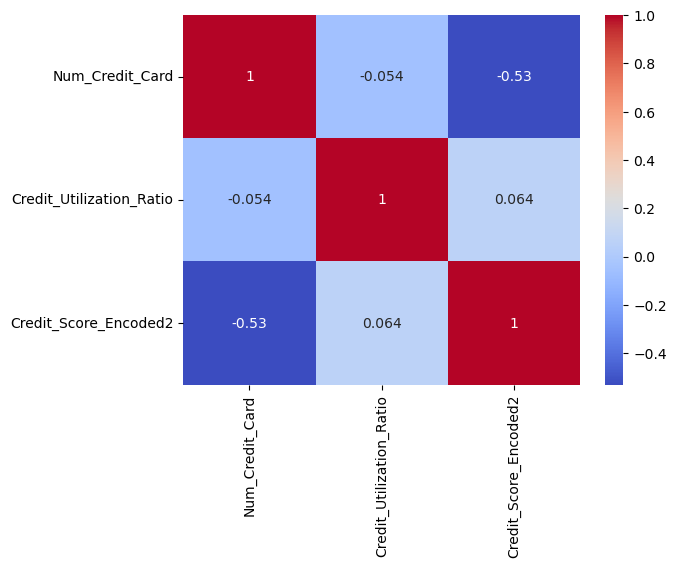

In [14]:
# Encode Credit_Score to numerical
filtered_df['Credit_Score_Encoded2'] = filtered_df['Credit_Score'].map({'Good': 3, 'Average': 2, 'Poor': 1})


# Correlation

correlation = filtered_df[['Num_Credit_Card', 'Credit_Utilization_Ratio', 'Credit_Score_Encoded2']].corr()
print(correlation)



#Heatmap Visualization

import seaborn as sns
import matplotlib.pyplot as plt

sns.heatmap(correlation, annot=True, cmap="coolwarm")
plt.show()

### Significance of Correlation

In [15]:
import numpy as np
import pandas as pd
import scipy.stats as stats

# Filter out rows where Num_Credit_Card is 0
filtered_df_clean = filtered_df[filtered_df['Num_Credit_Card'] != 0]

# Check for NaN or Inf values in the relevant columns after filtering
print(filtered_df_clean[['Credit_Score_Encoded2', 'Num_Credit_Card']].isnull().sum())  # Check for NaNs
print((filtered_df_clean[['Credit_Score_Encoded2', 'Num_Credit_Card']] == float('inf')).sum())  # Check for Infs

# Filtering NaN or Inf values
filtered_df_clean = filtered_df_clean.replace([np.inf, -np.inf], np.nan).dropna(subset=['Credit_Score_Encoded2', 'Num_Credit_Card'])


# Perform Pearson correlation test after cleaning the data
correlation, p_value = stats.pearsonr(filtered_df_clean['Credit_Score_Encoded2'], filtered_df_clean['Num_Credit_Card'])

# Print the results
print(f"Pearson Correlation Coefficient: {correlation:.5f}")
print(f"P-value: {p_value:.5f}")

# Interpretation
if p_value < 0.05:
    print("The correlation is statistically significant.")
else:
    print("The correlation is not statistically significant.")


Credit_Score_Encoded2    52463
Num_Credit_Card              0
dtype: int64
Credit_Score_Encoded2    0
Num_Credit_Card          0
dtype: int64
Pearson Correlation Coefficient: -0.53043
P-value: 0.00000
The correlation is statistically significant.


### Interpretation of Heatmap & Correlation Coefficient :

From the above Heatmap we get a **"Negative-Good correlation"** between Number of Credit Cards and Credit Score.
Calculation shows, value of correlation coefficient is **-0.53043** with a p value of **~0.00**
This indicates, with increase in Number of Credit Cards, Credit Score decreases. And the correlation is statistically significant.
In practical situation also, *persons with greater number of credit cards often fail to manage all of them properly, resulting Poor Credit Score.*

posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values


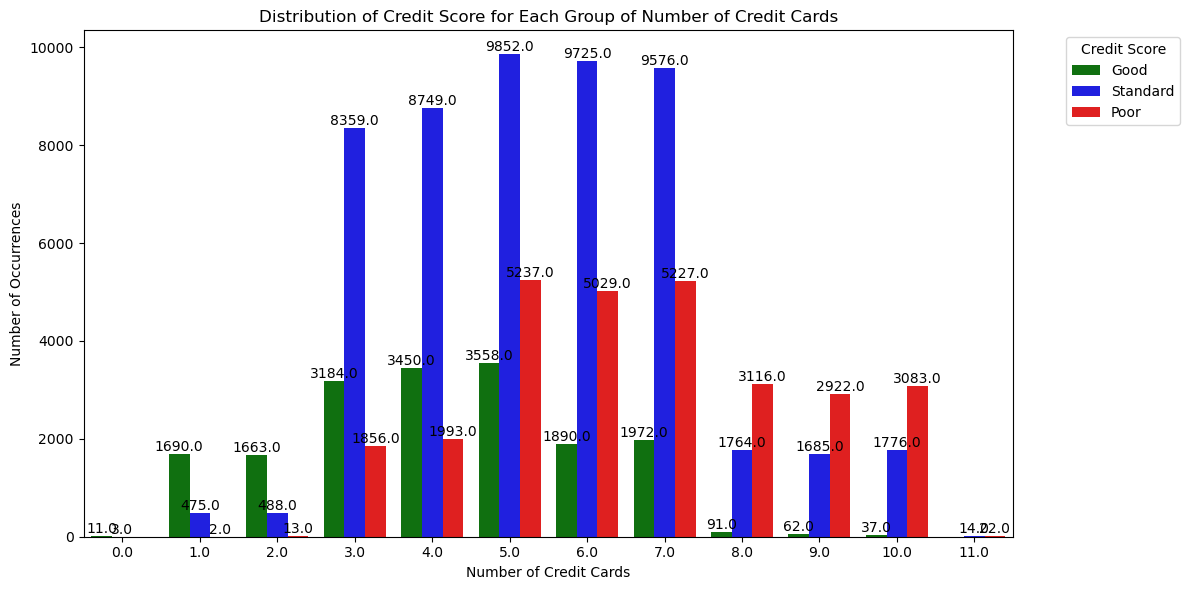

In [16]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(12, 6))

# Plot the count plot
ax = sns.countplot(
    x='Num_Credit_Card',            # Group data by Number of Credit Cards
    hue='Credit_Score',              # Split the count by Credit Score categories
    data=filtered_df,               # The dataset
    palette={'Poor': 'red', 'Standard': 'blue', 'Good': 'green'}  # Custom colors for each credit score
)

# Add titles and labels
plt.title('Distribution of Credit Score for Each Group of Number of Credit Cards')
plt.xlabel('Number of Credit Cards')
plt.ylabel('Number of Occurrences')
plt.legend(title='Credit Score', bbox_to_anchor=(1.05, 1), loc='upper left')  # Legend outside the plot

# Annotate the counts on top of the bars
for p in ax.patches:
    # Get the height of each bar (count)
    count = float(p.get_height())
    # Get the position for the label (x, y coordinates)
    x = p.get_x() + p.get_width() / 2
    y = p.get_height()
    # Place the count label at the center of each bar
    ax.text(x, y, str(count), ha='center', va='bottom', fontsize=10)

# Save the plot as an image file
plt.savefig("countplot.png", dpi=1000, bbox_inches='tight')    
    
# Show the plot
plt.tight_layout()
plt.show()

### Interpretation of Countplot:

1. Most of the Credit Scores belongs to those cases where Number of Credit Cards arebetween 3 to 7.
2. Number of "Good" credit score, increased till Number of Credit Card is 5, after that decreased.
3. Number of "Standard" credit score, increased till Number of Credit Card is 7, after that decreased.
4. Number of "Poor" credit score, increased till Number of Credit Card is 7.

### Conclusion:

The statement "Higher Credit Score is associated with Higher Number of Credit Cards" is not true as we have observed, with increase in Number of Credit Cards, Good Credit Scores decreased and Poor Credit Scores increased.

# Is there a Negative correlation between Number of Delayed Payments and Credit Score ?

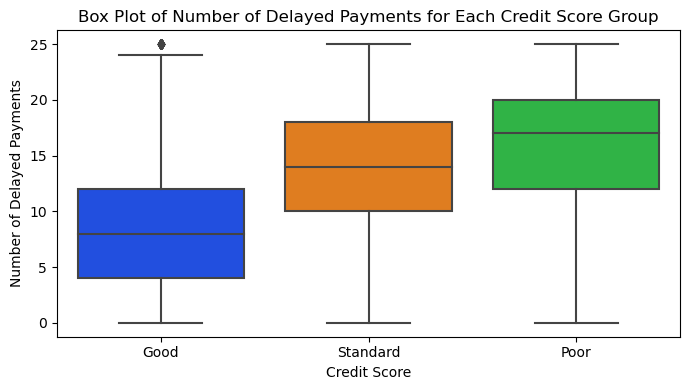

In [17]:
import seaborn as sns
import matplotlib.pyplot as plt

# Set the figure size
plt.figure(figsize=(7, 4))

# Create the boxplot
sns.boxplot(
    x='Credit_Score',                # Credit Score groups on the x-axis
    y='Num_of_Delayed_Payment',      # Number of Delayed Payments on the y-axis
    data=df,
    palette= 'bright'
)

# Add titles and labels
plt.title('Box Plot of Number of Delayed Payments for Each Credit Score Group')
plt.xlabel('Credit Score')
plt.ylabel('Number of Delayed Payments')

# Display the plot
plt.tight_layout()
plt.show()

In [18]:
import pandas as pd
import scipy.stats as stats

# Encode Credit_Score to numerical values
filtered_df['Credit_Score_Encoded'] = filtered_df['Credit_Score'].map({'Poor': 0, 'Standard': 1, 'Good': 2})

# Check for NaN values and drop if any
filtered_df_clean = filtered_df.dropna(subset=['Num_of_Delayed_Payment', 'Credit_Score_Encoded'])

# Calculate the Pearson correlation
correlation, p_value = stats.pearsonr(filtered_df_clean['Num_of_Delayed_Payment'], filtered_df_clean['Credit_Score_Encoded'])

# Print results
print(f"Pearson Correlation Coefficient: {correlation:.5f}")
print(f"P-value: {p_value:.5f}")

# Interpretation
if p_value < 0.05:
    print("The correlation is statistically significant.")
else:
    print("The correlation is not statistically significant.")


Pearson Correlation Coefficient: -0.37199
P-value: 0.00000
The correlation is statistically significant.


C:\Users\Mr. Amlan chatterjee\AppData\Local\Temp\ipykernel_7924\103642482.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_df['Credit_Score_Encoded'] = filtered_df['Credit_Score'].map({'Poor': 0, 'Standard': 1, 'Good': 2})


### Conclusion:

The boxplot shows, increase in avg number of delays with decrease in Credit Score. By Calculating the Pearson correlation coefficient we get a value of **-0.37199** with a p-value close to **0.00**. Hence we can conclude, there is a **"Significant Moderate Negative Correlation"** between Number of Delayed Payments with Credit Score.

# VISUALIZATIONS

## Distribution of Credit Score among Different Age Groups 

In [19]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Define age bins (e.g., 0–20, 21–30, etc.)
age_bins = [15, 20, 25, 30, 35, 40, 45, 50, 55, 60]
age_labels = ['15-20', '21-25', '26-30', '31-35', '36-40', '41-45', '46-50', '51-55', '56-60']

# Create a new column for age groups
filtered_df['Age_Group'] = pd.cut(df['Age'], bins=age_bins, labels=age_labels)

summary_credit_score = (
    filtered_df.groupby('Age_Group')['Credit_Score_Encoded'].describe().reset_index()
)

print(summary_credit_score)

  Age_Group    count      mean       std  min  25%  50%  75%  max
0     15-20  11021.0  0.778604  0.651941  0.0  0.0  1.0  1.0  2.0
1     21-25  13961.0  0.858391  0.670769  0.0  0.0  1.0  1.0  2.0
2     26-30  14459.0  0.837748  0.667889  0.0  0.0  1.0  1.0  2.0
3     31-35  14279.0  0.863996  0.669503  0.0  0.0  1.0  1.0  2.0
4     36-40  14273.0  0.868773  0.677618  0.0  0.0  1.0  1.0  2.0
5     41-45  13671.0  0.851657  0.660693  0.0  0.0  1.0  1.0  2.0
6     46-50   7005.0  1.189722  0.650183  0.0  1.0  1.0  2.0  2.0
7     51-55   6764.0  1.217179  0.635111  0.0  1.0  1.0  2.0  2.0
8     56-60    377.0  1.164456  0.626973  0.0  1.0  1.0  2.0  2.0


C:\Users\Mr. Amlan chatterjee\AppData\Local\Temp\ipykernel_7924\343504144.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_df['Age_Group'] = pd.cut(df['Age'], bins=age_bins, labels=age_labels)


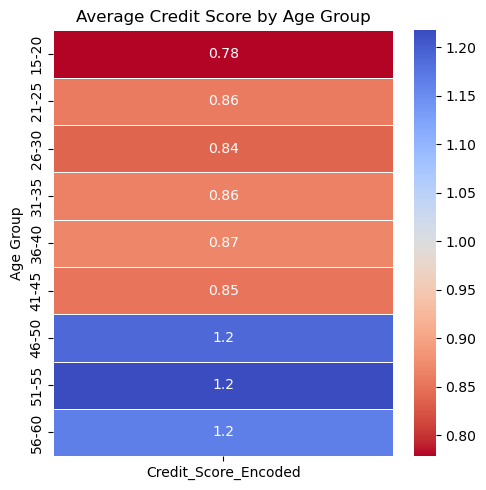

In [20]:
# Average Credit Score for each Age Group
heatmap_data = filtered_df.groupby('Age_Group')['Credit_Score_Encoded'].mean().reset_index()

# Create a pivot table
heatmap_data_pivot = heatmap_data.pivot_table(index='Age_Group', values='Credit_Score_Encoded')

# Plot heatmap
plt.figure(figsize=(5, 5))
sns.heatmap(heatmap_data_pivot, annot=True, cmap='coolwarm_r', cbar=True, linewidths=0.5)
plt.title('Average Credit Score by Age Group')
plt.ylabel('Age Group')

plt.savefig("Average_Credit_Score_by_Age_Group.png", dpi=1000, bbox_inches='tight')

plt.tight_layout()
plt.show()

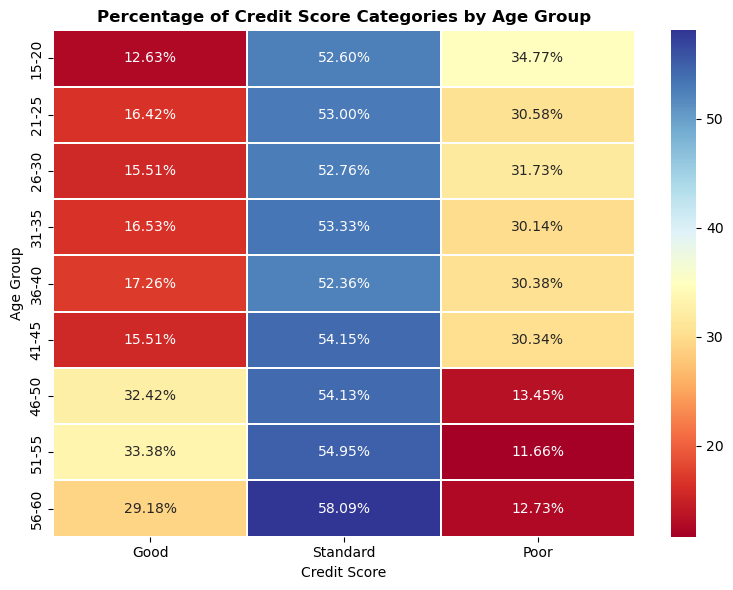

In [21]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Group by Age Group and Credit Score, calculate counts
heatmap_data = filtered_df.groupby(['Age_Group', 'Credit_Score']).size().unstack()

# Reorder columns for Credit Score categories
heatmap_data = heatmap_data[['Good', 'Standard', 'Poor']]

# Normalize counts to get proportions and convert to percentages
heatmap_data = heatmap_data.div(heatmap_data.sum(axis=1), axis=0) * 100

# Plot heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(
    heatmap_data,
    annot=True,
    fmt=".2f",  # Format numbers as integers
    cmap= 'RdYlBu',
    cbar=True,
    linewidths=0.04,
    annot_kws={"size": 10},  # Adjust annotation text size
)

# Add % sign to annotations
for text in plt.gca().texts:
    text.set_text(f"{text.get_text()}%")

plt.title('Percentage of Credit Score Categories by Age Group', fontsize=12, weight='bold')
plt.xlabel('Credit Score')
plt.ylabel('Age Group')

plt.savefig("credit_score_age_heatmap.png", dpi=1000, bbox_inches='tight')

plt.tight_layout()
plt.show()


In [30]:
import pandas as pd
import plotly.express as px

# Assuming `filtered_df` is the DataFrame already prepared
# Group by Age Group and Credit Score, calculate counts
heatmap_data = filtered_df.groupby(['Age_Group', 'Credit_Score']).size().unstack()

# Reorder columns for Credit Score categories
heatmap_data = heatmap_data[['Good', 'Standard', 'Poor']]

# Normalize counts to get proportions and convert to percentages
heatmap_data = heatmap_data.div(heatmap_data.sum(axis=1), axis=0) * 100

# Reset index to convert to a long-format DataFrame for Plotly
heatmap_data = heatmap_data.reset_index().melt(
    id_vars='Age_Group', var_name='Credit_Score', value_name='Percentage'
)

# Create the interactive heatmap
fig = px.imshow(
    heatmap_data.pivot('Age_Group', 'Credit_Score', 'Percentage'),
    color_continuous_scale='RdYlBu',
    labels={'color': 'Percentage (%)'},
    title='Interactive Heatmap: Credit Score Categories by Age Group'
)

# Update layout for better readability and set figure size
fig.update_layout(
    xaxis_title='Credit Score',
    yaxis_title='Age Group',
    coloraxis_colorbar=dict(title='Percentage (%)'),
    title_font=dict(size=16, family='Arial', color='black'),
    xaxis=dict(tickangle=45),
    width=800,  # Set figure width
    height=600,  # Set figure height
)

# Show the figure
fig.show()


C:\Users\Mr. Amlan chatterjee\AppData\Local\Temp\ipykernel_7924\1216480509.py:21: FutureWarning:

In a future version of pandas all arguments of DataFrame.pivot will be keyword-only.



## Conclusions:

Credit Score Matures with Age:

Older age groups (46-60) show a higher proportion of Good scores and a lower proportion of Poor scores.
This supports the idea that credit behavior improves as people gain financial experience.


Youth Struggles with Credit:

Younger age groups (15-25) show higher percentages of Poor scores, possibly due to inexperience, limited credit history, or poor credit management.

Majority in Standard Credit Score:

Most individuals, regardless of age, fall into the Standard category. This indicates average credit health is common across demographics.

# SEASONAL PATTERN IN CREDIT SCORE

Overall Credit Score Scenario depends on number of users in each month. So, First we will check how number of users are varrying

In [31]:
# Group by 'Month' and count unique Customer_IDs
monthly_user_count = df.groupby('Month')['Customer_ID'].nunique()

# Print the total number of users per month
print("Total number of users per month:")
print(monthly_user_count)

Total number of users per month:
Month
1    12500
2    12500
3    12500
4    12500
5    12500
6    12500
7    12500
8    12500
Name: Customer_ID, dtype: int64


The above shows, the given dataset contains 8 onths and each moth holds same number of users. Hence, we will assigne numerical value to the Credit Score categories ('Good': 2, 'Standard': 1, 'Poor': 0) to have a look on the overall credit score scenario.

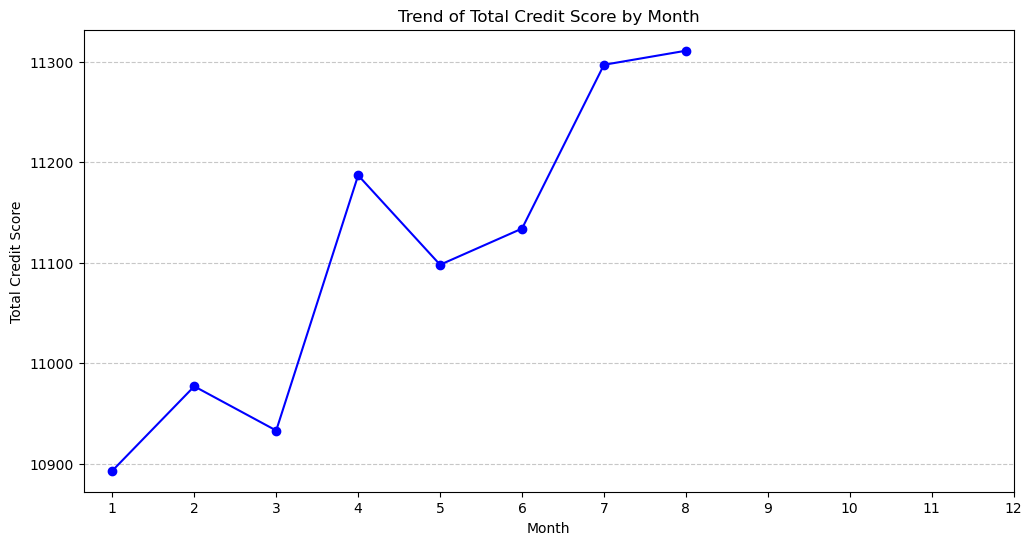

In [32]:
# Map numerical values to Credit_Score categories
score_mapping = {'Good': 2, 'Standard': 1, 'Poor': 0}
df['Credit_Score_Numeric'] = df['Credit_Score'].map(score_mapping)

# Group by 'Month' and calculate the total credit score
monthly_total_score = df.groupby('Month')['Credit_Score_Numeric'].sum()

# Plot the trend of total credit score
plt.figure(figsize=(12, 6))
plt.plot(monthly_total_score.index, monthly_total_score.values, marker='o', linestyle='-', color='b')
plt.title('Trend of Total Credit Score by Month')
plt.xlabel('Month')
plt.ylabel('Total Credit Score') # 'Good': 2, 'Standard': 1, 'Poor': 0
plt.xticks(range(1, 13))  # Assuming months are 1-12
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

The above plot of total credit score of each month shows sharp improvement in credit score between 3rd and 4th month and, 6th and 7th month. And a sharp detoreation from 4th to 5th month. To further investigate, we will calculate percentage of each credit score category for each month and plot the over the given 8 months.

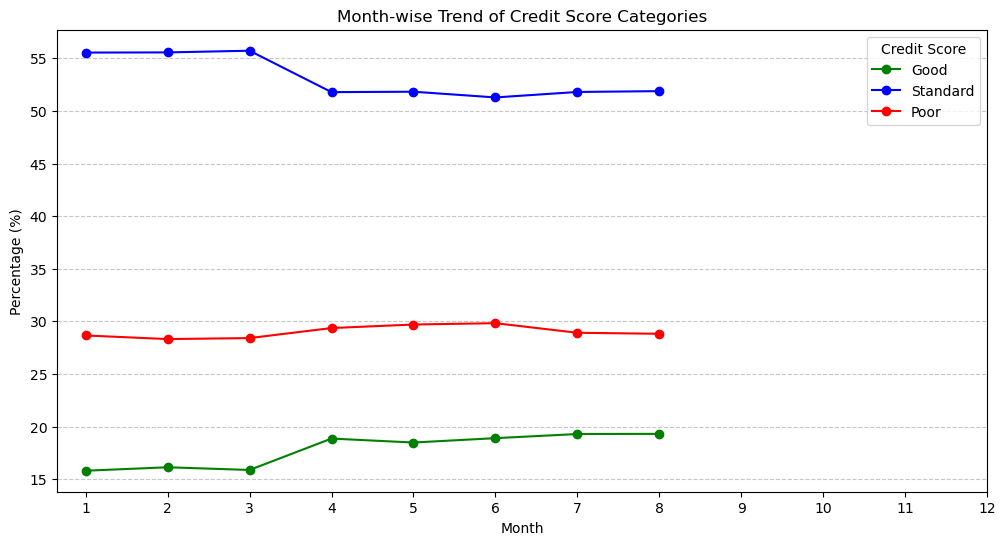

In [33]:
# Ensuring 'Month' is numeric
df['Month'] = pd.to_numeric(df['Month'], errors='coerce')

# Group by 'Month' and 'Credit_Score', then count occurrences
credit_score_trends = df.groupby(['Month', 'Credit_Score']).size().unstack()

# Normalize counts to proportions
credit_score_trends = credit_score_trends.div(credit_score_trends.sum(axis=1), axis=0) * 100

# Plot month-wise trends 
plt.figure(figsize=(12, 6))
plt.plot(credit_score_trends.index, credit_score_trends['Good'], marker='o', color='green', label='Good')
plt.plot(credit_score_trends.index, credit_score_trends['Standard'], marker='o', color='blue', label='Standard')
plt.plot(credit_score_trends.index, credit_score_trends['Poor'], marker='o', color='red', label='Poor')

# Add title and labels
plt.title('Month-wise Trend of Credit Score Categories')
plt.xlabel('Month')
plt.ylabel('Percentage (%)')
plt.xticks(range(1, 13))  # Assuming months are 1-12
plt.legend(title='Credit Score')
plt.grid(axis='y', linestyle='--', alpha=0.7)

plt.savefig("credit_score_trend.png", dpi=1000, bbox_inches='tight')
plt.show()


Breakdown categorically shows some trends that can explain the variations in overall credit score scenario. From 3rd to 4th month Good credit score improved by almost 4% which can be attributed as the sharp improvement in the total credit score scenario between 3rd to 4th month.The decrease in Good category between and increase in Poor category 4th to th month reflects in overal Credit Score scenario. The sharpest increase in overall credit score is due to decrease in Poor category and steady increaase in Good and Standard category.

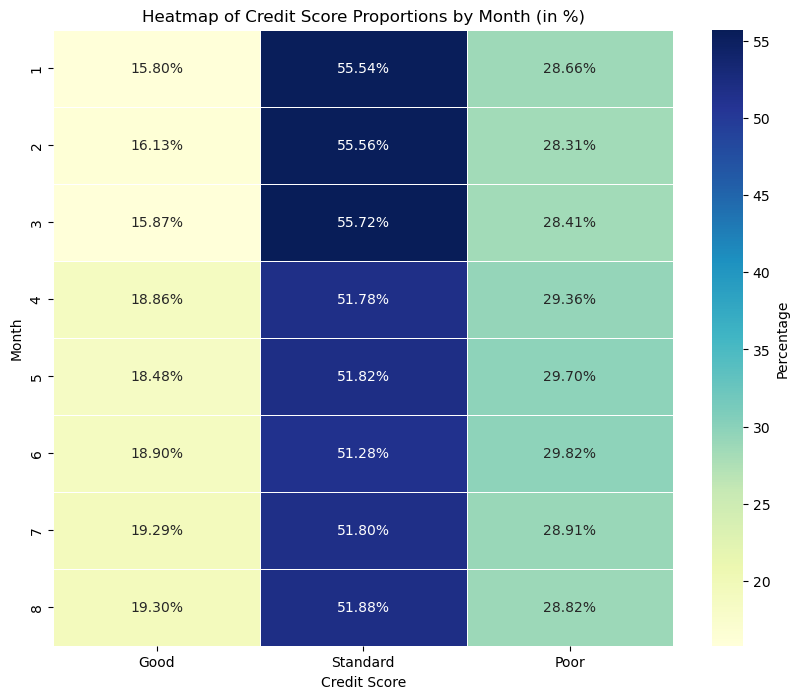

In [34]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Ensure 'Month' is numeric
df['Month'] = pd.to_numeric(df['Month'], errors='coerce')

# Group by 'Month' and 'Credit_Score', then count occurrences
credit_score_dist = df.groupby(['Month', 'Credit_Score']).size().unstack()

# Ensure the order of Credit_Score categories
credit_score_dist = credit_score_dist[['Good', 'Standard', 'Poor']]

# Normalize counts to proportions (convert to percentages)
credit_score_dist = credit_score_dist.div(credit_score_dist.sum(axis=1), axis=0) * 100

# Plot heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(
    credit_score_dist,
    annot=True,
    fmt=".2f",  # Format numbers as two decimals
    cmap="YlGnBu",
    cbar_kws={'label': 'Percentage'},
    linewidths=0.5
)

# Add % sign to annotations
for text in plt.gca().texts:
    text.set_text(f"{text.get_text()}%")

plt.title('Heatmap of Credit Score Proportions by Month (in %)')
plt.xlabel('Credit Score')
plt.ylabel('Month')

plt.savefig("credit_score_Month_heatmap.png", dpi=1000, bbox_inches='tight')

plt.show()


### Conclusion:

Dominance of Standard Scores: Across all months, the "Standard" credit score category consistently represents the largest proportion, ranging from approximately 51.28% to 55.72%. This suggests a relatively stable and predominant trend of individuals in the standard credit score range.

Improvement in Good Credit Scores: There is a slight upward trend in the proportion of individuals with "Good" credit scores, increasing from 15.80% in Month 1 to 19.30% in Month 8. This could indicate improving financial behavior or better credit management over time.

Fluctuations in Poor Credit Scores: The "Poor" credit score category shows some variation, starting at at 5th month.

# Distribution of Annual Income among the ranges of different Credit Scores

In [27]:
# Group by 'Credit_Score' and describe the 'Annual_Income'
annual_income_summary = df.groupby('Credit_Score')['Annual_Income'].describe()

# Print the detailed statistical summary
print(annual_income_summary)


                count          mean           std       min       25%  \
Credit_Score                                                            
Good          17828.0  65203.672105  44484.883431  7189.540  29709.73   
Poor          28998.0  40584.515325  31969.248921  7005.930  16770.91   
Standard      53174.0  50987.164840  37569.335731  7006.035  19998.33   

                    50%        75%        max  
Credit_Score                                   
Good          44927.860  97417.425  179825.36  
Poor          32064.860  57877.950  179987.28  
Standard      36824.175  72904.160  179987.28  


<Figure size 1000x600 with 0 Axes>

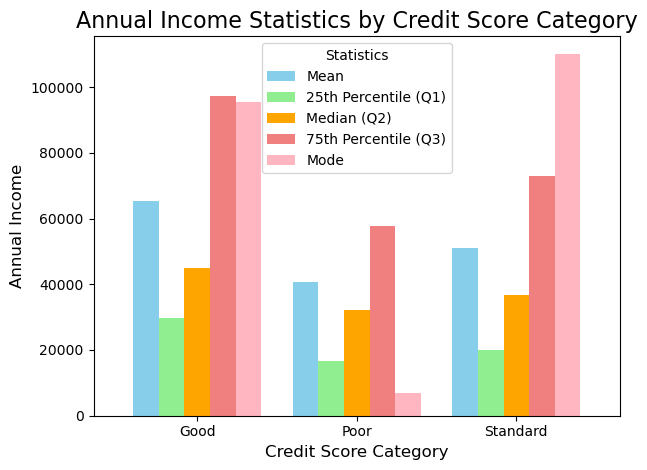

In [28]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Calculate the statistics for Annual Income by Credit Score
summary_stats = df.groupby('Credit_Score')['Annual_Income'].agg(
    mean='mean', # average annual income
    Q1=lambda x: x.quantile(0.25), 
    median='median', 
    Q3=lambda x: x.quantile(0.75), 
    mode=lambda x: x.mode()[0]  # Mode (highest frequency)
)

# Plotting
plt.figure(figsize=(10, 6))
summary_stats.plot(kind='bar', width=0.8, color=['skyblue', 'lightgreen', 'orange', 'lightcoral', 'lightpink'])

# Adding labels and title
plt.title('Annual Income Statistics by Credit Score Category', fontsize=16)
plt.xlabel('Credit Score Category', fontsize=12)
plt.ylabel('Annual Income', fontsize=12)
plt.xticks(rotation=0)
plt.tight_layout()
plt.legend(title='Statistics', labels=['Mean', '25th Percentile (Q1)', 'Median (Q2)', '75th Percentile (Q3)', 'Mode'])

plt.savefig("Annual Income Statistics by Credit Score Category.png", dpi=1000, bbox_inches='tight')

# Show plot
plt.show()


C:\ProgramData\Anaconda3\lib\site-packages\seaborn\axisgrid.py:703: FutureWarning:

iteritems is deprecated and will be removed in a future version. Use .items instead.

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\axisgrid.py:703: FutureWarning:

iteritems is deprecated and will be removed in a future version. Use .items instead.

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\axisgrid.py:703: FutureWarning:

iteritems is deprecated and will be removed in a future version. Use .items instead.



<Figure size 1500x1200 with 0 Axes>

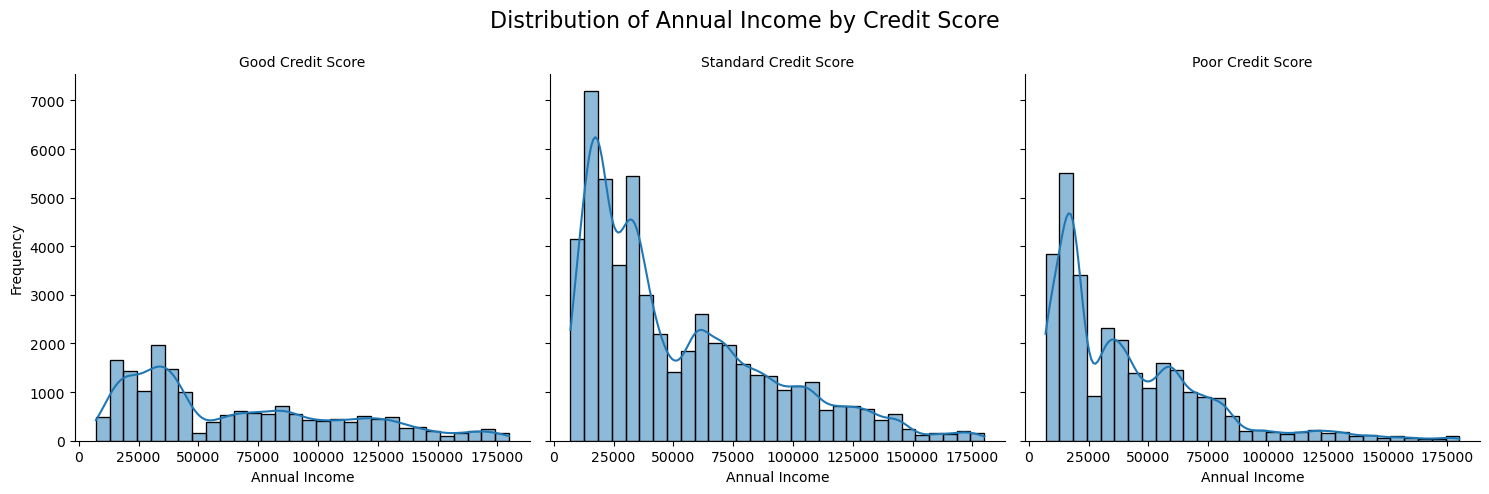

In [29]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(15, 12))

# Create a FacetGrid to plot distributions by Credit_Score
g = sns.FacetGrid(df, col="Credit_Score", height=5, col_wrap=3, palette="Set3")

# Map the histogram plot with KDE for each category
g.map(sns.histplot, 'Annual_Income', kde=True, bins=30)

# Adjust labels and titles
g.set_axis_labels('Annual Income', 'Frequency')
g.set_titles(col_template="{col_name} Credit Score")
g.fig.suptitle('Distribution of Annual Income by Credit Score', fontsize=16)

# Adjust layout for better spacing
g.tight_layout()
g.fig.subplots_adjust(top=0.85)  # Adjust title position

plt.savefig("Distribution of Annual Income by Credit Score.png", dpi=1000, bbox_inches='tight')

# Show the plot
plt.show()


### Conclusion:


Individuals with Good Credit Scores have the highest income levels and the broadest distribution, including more high-income earners.

The Standard Credit Score group serves as a middle ground, with a moderate range and a slightly skewed income distribution.

Those with Poor Credit Scores experience lower income levels, with a narrow distribution and a strong concentration in the lower-income range.

# Key Conclusions & Summary:

### Correlation Between Annual Income and Credit Score:

Higher annual income strongly correlates with higher credit scores.
Exceptions exist where individuals with high incomes have poor credit scores, potentially due to other factors like poor credit management.

**Stockholder Benefit:** Identifying the strong correlation between income and credit score helps assess the creditworthiness of customers in different income brackets. This aids in better risk management and designing income-targeted financial products.

### Impact of Credit Utilization Ratio:

Managing credit utilization (keeping it low) significantly impacts credit scores more than reducing the number of loans.
High credit utilization or too many loans still negatively influence credit scores.

**Stockholder Benefit:** The finding that credit utilization significantly impacts scores suggests prioritizing educating customers about managing utilization. This can reduce defaults, improve customer financial health, and enhance the company's reputation and long-term profitability.

### Number of Credit Cards and Credit Scores:

Negative correlation (r=−0.53043,p=0.00) between the number of credit cards and credit scores.
Higher credit card ownership often leads to mismanagement, resulting in poor credit scores.

**Stockholder Benefit:** Understanding the negative correlation helps in targeting specific customer behaviors. Companies can design campaigns to encourage responsible credit card use or consolidate multiple cards into fewer products, leading to better customer retention and reduced risk.

### Delayed Payments and Credit Scores:

Moderate negative correlation (r=−0.37199,p=0.00) between delayed payments and credit scores.
More delayed payments correlate with lower credit scores, as shown in boxplots.

**Stockholder Benefit:** Insights into delayed payments provide actionable data for creating programs to reduce late payments (e.g., automated reminders or flexible payment plans). This directly influences cash flow and minimizes non-performing loans (NPLs).

### Age and Credit Scores:

Older Age Groups (46-60): Higher proportion of good scores due to improved financial behavior.
Younger Age Groups (15-25): Struggle with poor scores due to limited credit history or poor credit management.

**Stockholder Benefit:** Age-group-specific trends allow targeted marketing and product development. For instance:

-  Older customers may be offered investment products or larger loans due to their better credit scores.
-  Younger customers may benefit from educational programs or starter credit products to build their credit history responsibly.

### Credit Score Distribution Trends:

Standard Scores dominate (51.28%–55.72%), showing average credit health across demographics.
Improvement observed in good credit scores, increasing from 15.80% to 19.30% over eight months.
Fluctuations seen in poor credit scores, particularly starting from the fifth month.

**Stockholder Benefit:** Observing trends in credit score improvements and fluctuations helps forecast overall portfolio health and adjust risk models accordingly. This insight supports strategic planning and indicates the effectiveness of interventions or changes in policy.

### Income Distribution by Credit Score:

Good Credit Scores: Highest income levels and broadest distribution, including high-income earners.
Standard Credit Scores: Middle-ground income with moderate distribution.
Poor Credit Scores: Lower income levels, tightly clustered in the lower range.

**Stockholder Benefit:** Differentiated income distributions by credit score categories help refine segmentation strategies. For example:

- High-income individuals with good credit scores could be offered premium services.
- Lower-income individuals with poor credit scores could be targeted with micro-loans or financial counseling services, creating potential for revenue growth and social impact.